In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

### Import Datasets
We are going to classify an image into 10 different classes and will use 
fashion data set already available in keras


Dataset of 60,000 28*28 grayscale imagesof 10 fashion categories, along with a test set of 10,000 images

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, Y_train_full),(X_test,Y_test)= fashion_mnist.load_data()

In [5]:
class_names=["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

### Data Reshape

for CNN we require 3d array as input (height,width,channel) unlike ANN model where we feed it an 1d array, so data reshaping is required

In [6]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

### Data Normalization
now we do data normalization so that the data dimensions are of almost same scale

In [7]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

### Now we split the data into train/validation/test datasets
* Training data - used for training model
* Validation Data - used for tuning the hyperparameters and evalate the model (optimize the performance of model)
* Test Data - used to test the model after above two steps

In [8]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:] # 1st 5000 for validation and rest 55000 for training
Y_valid,Y_train=Y_train_full[:5000],Y_train_full[5000:]
X_test=X_test_n

### Create the model architecture

In [9]:
np.random.seed(42) # to get same output everytime for 1 test using same initial weights
tf.random.set_seed(42)

We are going to us the ANN model used earlier but here we are going to add CNN layers before ANN layers


In [11]:


model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu")) # hidden layer 1
model.add(keras.layers.Dense(100,activation="relu")) # hidden layer 2
model.add(keras.layers.Dense(10,activation="softmax")) # output layer

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

#### We will now compile the model

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [16]:
model_history=model.fit(X_train,Y_train,epochs=5,batch_size=64,validation_data=(X_valid,Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 48s 878us/sample - loss: 0.5564 - accuracy: 0.7995 - val_loss: 0.5155 - val_accuracy: 0.8182
Epoch 2/5
55000/55000 [==============================] - 47s 855us/sample - loss: 0.4875 - accuracy: 0.8244 - val_loss: 0.4679 - val_accuracy: 0.8348
Epoch 3/5
55000/55000 [==============================] - 49s 889us/sample - loss: 0.4483 - accuracy: 0.8394 - val_loss: 0.4624 - val_accuracy: 0.8332
Epoch 4/5
55000/55000 [==============================] - 50s 909us/sample - loss: 0.4207 - accuracy: 0.8500 - val_loss: 0.4070 - val_accuracy: 0.8584
Epoch 5/5
55000/55000 [==============================] - 45s 822us/sample - loss: 0.3993 - accuracy: 0.8577 - val_loss: 0.4564 - val_accuracy: 0.8324


more training is required and also increasing the CNN layers can increase accuracy

### Visualization of model parameters

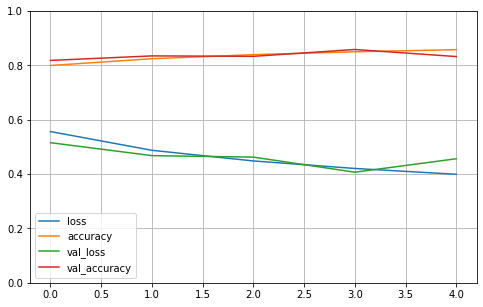

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### We will now check the performance of model

In [18]:
model.evaluate(X_train,Y_train)

55000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4681698902563615, 0.8251455]

#### first value predicts loss second value depicts accuracy

### Now we will predict new values using the test data set

In [19]:
X_new = X_test[:3] # we will test on 3 images for now

In [20]:
Y_proba=model.predict(X_new)
Y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.2 , 0.01, 0.78],
       [0.  , 0.  , 0.52, 0.  , 0.06, 0.  , 0.42, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
Y_pred=model.predict_classes(X_new)
Y_pred

array([9, 2, 1], dtype=int64)

In [22]:
Y_test[:3]

array([9, 2, 1], dtype=uint8)

Hence predictions are correct

In [23]:
model.save("model.h5")

In [24]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>